In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
import lhapdf
import sys
sys.path.insert(1,'/Users/sj400/Duke/sidis_project/calculate_xs')
import tmdlib.tmd_fit as tmd
print(sys.path)
import iminuit
from iminuit import Minuit
from iminuit.cost import LeastSquares

import get_weighted 

import lhapdf
import sys
sys.path.insert(1,'/Users/sj400/Duke/sidis_project/calculate_xs')
import tmdlib.tmd_fit as tmd
print(sys.path)
import iminuit
from iminuit import Minuit
from iminuit.cost import LeastSquares

import tmdlib.tmd_fit_witherr as tmd_err

['/Users/sj400/Duke/notebook/Unpol_proposal', '/Users/sj400/Duke/sidis_project/calculate_xs', '/Users/sj400/Duke/sidis_project/calculate_xs', '/Users/sj400/Duke/sidis_project/calculate_xs', '/Users/sj400/Duke/sidis_project/calculate_xs', '/Users/sj400/Duke/sidis_project/calculate_xs', '/opt/homebrew/Cellar/root/6.26.06_2/lib/root', '', '/opt/homebrew/Cellar/lhapdf/6.5.3/lib/python3.10/site-packages', '/Users/sj400/miniconda3/lib/python310.zip', '/Users/sj400/miniconda3/lib/python3.10', '/Users/sj400/miniconda3/lib/python3.10/lib-dynload', '/Users/sj400/miniconda3/lib/python3.10/site-packages']
['/Users/sj400/Duke/notebook/Unpol_proposal', '/Users/sj400/Duke/sidis_project/calculate_xs', '/Users/sj400/Duke/sidis_project/calculate_xs', '/Users/sj400/Duke/sidis_project/calculate_xs', '/Users/sj400/Duke/sidis_project/calculate_xs', '/Users/sj400/Duke/sidis_project/calculate_xs', '/Users/sj400/Duke/sidis_project/calculate_xs', '/opt/homebrew/Cellar/root/6.26.06_2/lib/root', '', '/opt/homebre

In [4]:
Factor = 0.3894*1e6/137

Factor_3xs=math.sqrt(5)
Factor_3xspim=math.sqrt(5)

In [5]:
#for pim
#df_3xs_zQ2xbjPhT = pd.read_csv('../Unpol_proposal/Materials/Shuo_Vlad_unpol_cs_results/default_3xs_2024/CS3xs_default_x1_stat0_pim_new.dat',delim_whitespace=True)
#for pip
df_3xs_zQ2xbjPhT = pd.read_csv('../Unpol_proposal/Materials/Shuo_Vlad_unpol_cs_results/default_3xs_2024/CS3xs_default_x1_stat0_pip_new.dat',delim_whitespace=True)
#df_3xspim_zQ2xbjPhT.head()

In [6]:
PI = math.pi
print(PI)
z_cuts=[0.3,0.4,0.5,0.6]
#z_cuts=[0.3,0.35,0.4,0.45]
#Q2_cuts=[1,2,3,4,5]
Q2_cuts=[1,1.5,2,2.5,3]
xbj_cuts=[0,0.7]
#PhT_cuts = [0,0.2]
#PhT_cuts = [0,0.2]
#PhT_cuts = [0,0.2,0.4,0.6,0.8]
PhT_cuts = [0,0.1,0.2,0.3,0.4,0.5]
#PhT_cuts=[0.2,0.6]
#PhT_cuts=[0.2,0.4]
#phih_bins = [-3.14,-2.5,-2,-1.5,-1,-0.5,0,0.5,1,1.5,2,2.5,3.14]
#phih_bins =[-PI,-3*PI/5,-2*PI/5,-PI/5,PI/5,2*PI/5,3*PI/5,4*PI/5,PI]
phih_bins =[-PI,-0.8*PI,-0.6*PI,-0.4*PI,-0.15*PI,0,0.15*PI,0.4*PI,0.6*PI,0.8*PI,PI]

df_3xs_zQ2=df_3xs_zQ2xbjPhT[(df_3xs_zQ2xbjPhT['Ebeam']==11)&(df_3xs_zQ2xbjPhT['x']>xbj_cuts[0])&(df_3xs_zQ2xbjPhT['x']<xbj_cuts[1])]


3.141592653589793


In [7]:
df_3xs_1_1 = df_3xs_zQ2[df_3xs_zQ2['z']>z_cuts[0]][df_3xs_zQ2['z']<z_cuts[1]][df_3xs_zQ2['Q2']>Q2_cuts[0]][df_3xs_zQ2['Q2']<Q2_cuts[1]]
print(len(df_3xs_1_1[df_3xs_1_1['Ebeam']==11.0]))
print(len(df_3xs_1_1[df_3xs_1_1['Ebeam']==11.0]['phih'].unique()))

1071
1068


/var/folders/j9/hgt6bjfn0n78rvsbnlc10rqh0000gp/T/ipykernel_10289/1735272136.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_3xs_1_1 = df_3xs_zQ2[df_3xs_zQ2['z']>z_cuts[0]][df_3xs_zQ2['z']<z_cuts[1]][df_3xs_zQ2['Q2']>Q2_cuts[0]][df_3xs_zQ2['Q2']<Q2_cuts[1]]
/var/folders/j9/hgt6bjfn0n78rvsbnlc10rqh0000gp/T/ipykernel_10289/1735272136.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_3xs_1_1 = df_3xs_zQ2[df_3xs_zQ2['z']>z_cuts[0]][df_3xs_zQ2['z']<z_cuts[1]][df_3xs_zQ2['Q2']>Q2_cuts[0]][df_3xs_zQ2['Q2']<Q2_cuts[1]]


In [8]:
df_3xs_1_2 = df_3xs_zQ2[df_3xs_zQ2['z']>z_cuts[1]][df_3xs_zQ2['z']<z_cuts[2]][df_3xs_zQ2['Q2']>Q2_cuts[0]][df_3xs_zQ2['Q2']<Q2_cuts[1]]
print(len(df_3xs_1_1[df_3xs_1_1['Ebeam']==11.0]))
print(len(df_3xs_1_1[df_3xs_1_1['Ebeam']==11.0]['phih'].unique()))

1071
1068


/var/folders/j9/hgt6bjfn0n78rvsbnlc10rqh0000gp/T/ipykernel_10289/660959689.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_3xs_1_2 = df_3xs_zQ2[df_3xs_zQ2['z']>z_cuts[1]][df_3xs_zQ2['z']<z_cuts[2]][df_3xs_zQ2['Q2']>Q2_cuts[0]][df_3xs_zQ2['Q2']<Q2_cuts[1]]
/var/folders/j9/hgt6bjfn0n78rvsbnlc10rqh0000gp/T/ipykernel_10289/660959689.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_3xs_1_2 = df_3xs_zQ2[df_3xs_zQ2['z']>z_cuts[1]][df_3xs_zQ2['z']<z_cuts[2]][df_3xs_zQ2['Q2']>Q2_cuts[0]][df_3xs_zQ2['Q2']<Q2_cuts[1]]
/var/folders/j9/hgt6bjfn0n78rvsbnlc10rqh0000gp/T/ipykernel_10289/660959689.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_3xs_1_2 = df_3xs_zQ2[df_3xs_zQ2['z']>z_cuts[1]][df_3xs_zQ2['z']<z_cuts[2]][df_3xs_zQ2['Q2']>Q2_cuts[0]][df_3xs_zQ2['Q2']<Q2_cuts[1]]


In [9]:
df_3xs_1_3 = df_3xs_zQ2[df_3xs_zQ2['z']>z_cuts[2]][df_3xs_zQ2['z']<z_cuts[3]][df_3xs_zQ2['Q2']>Q2_cuts[0]][df_3xs_zQ2['Q2']<Q2_cuts[1]]
print(len(df_3xs_1_1[df_3xs_1_1['Ebeam']==11.0]))
print(len(df_3xs_1_1[df_3xs_1_1['Ebeam']==11.0]['phih'].unique()))

1071
1068


/var/folders/j9/hgt6bjfn0n78rvsbnlc10rqh0000gp/T/ipykernel_10289/2130574157.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_3xs_1_3 = df_3xs_zQ2[df_3xs_zQ2['z']>z_cuts[2]][df_3xs_zQ2['z']<z_cuts[3]][df_3xs_zQ2['Q2']>Q2_cuts[0]][df_3xs_zQ2['Q2']<Q2_cuts[1]]
/var/folders/j9/hgt6bjfn0n78rvsbnlc10rqh0000gp/T/ipykernel_10289/2130574157.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_3xs_1_3 = df_3xs_zQ2[df_3xs_zQ2['z']>z_cuts[2]][df_3xs_zQ2['z']<z_cuts[3]][df_3xs_zQ2['Q2']>Q2_cuts[0]][df_3xs_zQ2['Q2']<Q2_cuts[1]]
/var/folders/j9/hgt6bjfn0n78rvsbnlc10rqh0000gp/T/ipykernel_10289/2130574157.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_3xs_1_3 = df_3xs_zQ2[df_3xs_zQ2['z']>z_cuts[2]][df_3xs_zQ2['z']<z_cuts[3]][df_3xs_zQ2['Q2']>Q2_cuts[0]][df_3xs_zQ2['Q2']<Q2_cuts[1]]


In [10]:
df_3xs_2_1 = df_3xs_zQ2[df_3xs_zQ2['z']>z_cuts[0]][df_3xs_zQ2['z']<z_cuts[1]][df_3xs_zQ2['Q2']>Q2_cuts[1]][df_3xs_zQ2['Q2']<Q2_cuts[2]]
print(len(df_3xs_1_1[df_3xs_1_1['Ebeam']==11.0]))
print(len(df_3xs_1_1[df_3xs_1_1['Ebeam']==11.0]['phih'].unique()))

1071
1068


/var/folders/j9/hgt6bjfn0n78rvsbnlc10rqh0000gp/T/ipykernel_10289/38913910.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_3xs_2_1 = df_3xs_zQ2[df_3xs_zQ2['z']>z_cuts[0]][df_3xs_zQ2['z']<z_cuts[1]][df_3xs_zQ2['Q2']>Q2_cuts[1]][df_3xs_zQ2['Q2']<Q2_cuts[2]]
/var/folders/j9/hgt6bjfn0n78rvsbnlc10rqh0000gp/T/ipykernel_10289/38913910.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_3xs_2_1 = df_3xs_zQ2[df_3xs_zQ2['z']>z_cuts[0]][df_3xs_zQ2['z']<z_cuts[1]][df_3xs_zQ2['Q2']>Q2_cuts[1]][df_3xs_zQ2['Q2']<Q2_cuts[2]]


In [11]:
df_3xs_2_2 = df_3xs_zQ2[df_3xs_zQ2['z']>z_cuts[1]][df_3xs_zQ2['z']<z_cuts[2]][df_3xs_zQ2['Q2']>Q2_cuts[1]][df_3xs_zQ2['Q2']<Q2_cuts[2]]
print(len(df_3xs_1_1[df_3xs_1_1['Ebeam']==11.0]))
print(len(df_3xs_1_1[df_3xs_1_1['Ebeam']==11.0]['phih'].unique()))

1071
1068


/var/folders/j9/hgt6bjfn0n78rvsbnlc10rqh0000gp/T/ipykernel_10289/1303666535.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_3xs_2_2 = df_3xs_zQ2[df_3xs_zQ2['z']>z_cuts[1]][df_3xs_zQ2['z']<z_cuts[2]][df_3xs_zQ2['Q2']>Q2_cuts[1]][df_3xs_zQ2['Q2']<Q2_cuts[2]]
/var/folders/j9/hgt6bjfn0n78rvsbnlc10rqh0000gp/T/ipykernel_10289/1303666535.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_3xs_2_2 = df_3xs_zQ2[df_3xs_zQ2['z']>z_cuts[1]][df_3xs_zQ2['z']<z_cuts[2]][df_3xs_zQ2['Q2']>Q2_cuts[1]][df_3xs_zQ2['Q2']<Q2_cuts[2]]
/var/folders/j9/hgt6bjfn0n78rvsbnlc10rqh0000gp/T/ipykernel_10289/1303666535.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_3xs_2_2 = df_3xs_zQ2[df_3xs_zQ2['z']>z_cuts[1]][df_3xs_zQ2['z']<z_cuts[2]][df_3xs_zQ2['Q2']>Q2_cuts[1]][df_3xs_zQ2['Q2']<Q2_cuts[2]]


In [12]:
df_3xs_2_3 = df_3xs_zQ2[df_3xs_zQ2['z']>z_cuts[2]][df_3xs_zQ2['z']<z_cuts[3]][df_3xs_zQ2['Q2']>Q2_cuts[1]][df_3xs_zQ2['Q2']<Q2_cuts[2]]
print(len(df_3xs_1_1[df_3xs_1_1['Ebeam']==11.0]))
print(len(df_3xs_1_1[df_3xs_1_1['Ebeam']==11.0]['phih'].unique()))

1071
1068


/var/folders/j9/hgt6bjfn0n78rvsbnlc10rqh0000gp/T/ipykernel_10289/2563255446.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_3xs_2_3 = df_3xs_zQ2[df_3xs_zQ2['z']>z_cuts[2]][df_3xs_zQ2['z']<z_cuts[3]][df_3xs_zQ2['Q2']>Q2_cuts[1]][df_3xs_zQ2['Q2']<Q2_cuts[2]]
/var/folders/j9/hgt6bjfn0n78rvsbnlc10rqh0000gp/T/ipykernel_10289/2563255446.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_3xs_2_3 = df_3xs_zQ2[df_3xs_zQ2['z']>z_cuts[2]][df_3xs_zQ2['z']<z_cuts[3]][df_3xs_zQ2['Q2']>Q2_cuts[1]][df_3xs_zQ2['Q2']<Q2_cuts[2]]
/var/folders/j9/hgt6bjfn0n78rvsbnlc10rqh0000gp/T/ipykernel_10289/2563255446.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_3xs_2_3 = df_3xs_zQ2[df_3xs_zQ2['z']>z_cuts[2]][df_3xs_zQ2['z']<z_cuts[3]][df_3xs_zQ2['Q2']>Q2_cuts[1]][df_3xs_zQ2['Q2']<Q2_cuts[2]]


In [13]:
df_3xs_3_1 = df_3xs_zQ2[df_3xs_zQ2['z']>z_cuts[0]][df_3xs_zQ2['z']<z_cuts[1]][df_3xs_zQ2['Q2']>Q2_cuts[2]][df_3xs_zQ2['Q2']<Q2_cuts[3]]
print(len(df_3xs_1_1[df_3xs_1_1['Ebeam']==11.0]))
print(len(df_3xs_1_1[df_3xs_1_1['Ebeam']==11.0]['phih'].unique()))

1071
1068


/var/folders/j9/hgt6bjfn0n78rvsbnlc10rqh0000gp/T/ipykernel_10289/3731236058.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_3xs_3_1 = df_3xs_zQ2[df_3xs_zQ2['z']>z_cuts[0]][df_3xs_zQ2['z']<z_cuts[1]][df_3xs_zQ2['Q2']>Q2_cuts[2]][df_3xs_zQ2['Q2']<Q2_cuts[3]]
/var/folders/j9/hgt6bjfn0n78rvsbnlc10rqh0000gp/T/ipykernel_10289/3731236058.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_3xs_3_1 = df_3xs_zQ2[df_3xs_zQ2['z']>z_cuts[0]][df_3xs_zQ2['z']<z_cuts[1]][df_3xs_zQ2['Q2']>Q2_cuts[2]][df_3xs_zQ2['Q2']<Q2_cuts[3]]


In [14]:
df_3xs_3_2 = df_3xs_zQ2[df_3xs_zQ2['z']>z_cuts[1]][df_3xs_zQ2['z']<z_cuts[2]][df_3xs_zQ2['Q2']>Q2_cuts[2]][df_3xs_zQ2['Q2']<Q2_cuts[3]]
print(len(df_3xs_1_1[df_3xs_1_1['Ebeam']==11.0]))
print(len(df_3xs_1_1[df_3xs_1_1['Ebeam']==11.0]['phih'].unique()))

1071
1068


/var/folders/j9/hgt6bjfn0n78rvsbnlc10rqh0000gp/T/ipykernel_10289/4239354454.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_3xs_3_2 = df_3xs_zQ2[df_3xs_zQ2['z']>z_cuts[1]][df_3xs_zQ2['z']<z_cuts[2]][df_3xs_zQ2['Q2']>Q2_cuts[2]][df_3xs_zQ2['Q2']<Q2_cuts[3]]
/var/folders/j9/hgt6bjfn0n78rvsbnlc10rqh0000gp/T/ipykernel_10289/4239354454.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_3xs_3_2 = df_3xs_zQ2[df_3xs_zQ2['z']>z_cuts[1]][df_3xs_zQ2['z']<z_cuts[2]][df_3xs_zQ2['Q2']>Q2_cuts[2]][df_3xs_zQ2['Q2']<Q2_cuts[3]]
/var/folders/j9/hgt6bjfn0n78rvsbnlc10rqh0000gp/T/ipykernel_10289/4239354454.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_3xs_3_2 = df_3xs_zQ2[df_3xs_zQ2['z']>z_cuts[1]][df_3xs_zQ2['z']<z_cuts[2]][df_3xs_zQ2['Q2']>Q2_cuts[2]][df_3xs_zQ2['Q2']<Q2_cuts[3]]


In [15]:
df_3xs_3_3 = df_3xs_zQ2[df_3xs_zQ2['z']>z_cuts[2]][df_3xs_zQ2['z']<z_cuts[3]][df_3xs_zQ2['Q2']>Q2_cuts[2]][df_3xs_zQ2['Q2']<Q2_cuts[3]]
print(len(df_3xs_1_1[df_3xs_1_1['Ebeam']==11.0]))
print(len(df_3xs_1_1[df_3xs_1_1['Ebeam']==11.0]['phih'].unique()))

1071
1068


/var/folders/j9/hgt6bjfn0n78rvsbnlc10rqh0000gp/T/ipykernel_10289/165647900.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_3xs_3_3 = df_3xs_zQ2[df_3xs_zQ2['z']>z_cuts[2]][df_3xs_zQ2['z']<z_cuts[3]][df_3xs_zQ2['Q2']>Q2_cuts[2]][df_3xs_zQ2['Q2']<Q2_cuts[3]]
/var/folders/j9/hgt6bjfn0n78rvsbnlc10rqh0000gp/T/ipykernel_10289/165647900.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_3xs_3_3 = df_3xs_zQ2[df_3xs_zQ2['z']>z_cuts[2]][df_3xs_zQ2['z']<z_cuts[3]][df_3xs_zQ2['Q2']>Q2_cuts[2]][df_3xs_zQ2['Q2']<Q2_cuts[3]]
/var/folders/j9/hgt6bjfn0n78rvsbnlc10rqh0000gp/T/ipykernel_10289/165647900.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_3xs_3_3 = df_3xs_zQ2[df_3xs_zQ2['z']>z_cuts[2]][df_3xs_zQ2['z']<z_cuts[3]][df_3xs_zQ2['Q2']>Q2_cuts[2]][df_3xs_zQ2['Q2']<Q2_cuts[3]]


In [16]:
df_3xs_4_1 = df_3xs_zQ2[df_3xs_zQ2['z']>z_cuts[0]][df_3xs_zQ2['z']<z_cuts[1]][df_3xs_zQ2['Q2']>Q2_cuts[3]][df_3xs_zQ2['Q2']<Q2_cuts[4]]
print(len(df_3xs_1_1[df_3xs_1_1['Ebeam']==11.0]))
print(len(df_3xs_1_1[df_3xs_1_1['Ebeam']==11.0]['phih'].unique()))

1071
1068


/var/folders/j9/hgt6bjfn0n78rvsbnlc10rqh0000gp/T/ipykernel_10289/2895693434.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_3xs_4_1 = df_3xs_zQ2[df_3xs_zQ2['z']>z_cuts[0]][df_3xs_zQ2['z']<z_cuts[1]][df_3xs_zQ2['Q2']>Q2_cuts[3]][df_3xs_zQ2['Q2']<Q2_cuts[4]]
/var/folders/j9/hgt6bjfn0n78rvsbnlc10rqh0000gp/T/ipykernel_10289/2895693434.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_3xs_4_1 = df_3xs_zQ2[df_3xs_zQ2['z']>z_cuts[0]][df_3xs_zQ2['z']<z_cuts[1]][df_3xs_zQ2['Q2']>Q2_cuts[3]][df_3xs_zQ2['Q2']<Q2_cuts[4]]


In [17]:
df_3xs_4_2 = df_3xs_zQ2[df_3xs_zQ2['z']>z_cuts[1]][df_3xs_zQ2['z']<z_cuts[2]][df_3xs_zQ2['Q2']>Q2_cuts[3]][df_3xs_zQ2['Q2']<Q2_cuts[4]]
print(len(df_3xs_1_1[df_3xs_1_1['Ebeam']==11.0]))
print(len(df_3xs_1_1[df_3xs_1_1['Ebeam']==11.0]['phih'].unique()))

1071
1068


/var/folders/j9/hgt6bjfn0n78rvsbnlc10rqh0000gp/T/ipykernel_10289/2507560876.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_3xs_4_2 = df_3xs_zQ2[df_3xs_zQ2['z']>z_cuts[1]][df_3xs_zQ2['z']<z_cuts[2]][df_3xs_zQ2['Q2']>Q2_cuts[3]][df_3xs_zQ2['Q2']<Q2_cuts[4]]
/var/folders/j9/hgt6bjfn0n78rvsbnlc10rqh0000gp/T/ipykernel_10289/2507560876.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_3xs_4_2 = df_3xs_zQ2[df_3xs_zQ2['z']>z_cuts[1]][df_3xs_zQ2['z']<z_cuts[2]][df_3xs_zQ2['Q2']>Q2_cuts[3]][df_3xs_zQ2['Q2']<Q2_cuts[4]]
/var/folders/j9/hgt6bjfn0n78rvsbnlc10rqh0000gp/T/ipykernel_10289/2507560876.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_3xs_4_2 = df_3xs_zQ2[df_3xs_zQ2['z']>z_cuts[1]][df_3xs_zQ2['z']<z_cuts[2]][df_3xs_zQ2['Q2']>Q2_cuts[3]][df_3xs_zQ2['Q2']<Q2_cuts[4]]


In [18]:
df_3xs_4_3 = df_3xs_zQ2[df_3xs_zQ2['z']>z_cuts[2]][df_3xs_zQ2['z']<z_cuts[3]][df_3xs_zQ2['Q2']>Q2_cuts[3]][df_3xs_zQ2['Q2']<Q2_cuts[4]]
print(len(df_3xs_1_1[df_3xs_1_1['Ebeam']==11.0]))
print(len(df_3xs_1_1[df_3xs_1_1['Ebeam']==11.0]['phih'].unique()))

1071
1068


/var/folders/j9/hgt6bjfn0n78rvsbnlc10rqh0000gp/T/ipykernel_10289/1849816026.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_3xs_4_3 = df_3xs_zQ2[df_3xs_zQ2['z']>z_cuts[2]][df_3xs_zQ2['z']<z_cuts[3]][df_3xs_zQ2['Q2']>Q2_cuts[3]][df_3xs_zQ2['Q2']<Q2_cuts[4]]
/var/folders/j9/hgt6bjfn0n78rvsbnlc10rqh0000gp/T/ipykernel_10289/1849816026.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_3xs_4_3 = df_3xs_zQ2[df_3xs_zQ2['z']>z_cuts[2]][df_3xs_zQ2['z']<z_cuts[3]][df_3xs_zQ2['Q2']>Q2_cuts[3]][df_3xs_zQ2['Q2']<Q2_cuts[4]]
/var/folders/j9/hgt6bjfn0n78rvsbnlc10rqh0000gp/T/ipykernel_10289/1849816026.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_3xs_4_3 = df_3xs_zQ2[df_3xs_zQ2['z']>z_cuts[2]][df_3xs_zQ2['z']<z_cuts[3]][df_3xs_zQ2['Q2']>Q2_cuts[3]][df_3xs_zQ2['Q2']<Q2_cuts[4]]


0 0.1
52
0 0.2
208
0 0.3
467
0 0.4
770
0 0.5
1071


Text(0, 0.5, '$F_{UU}$')

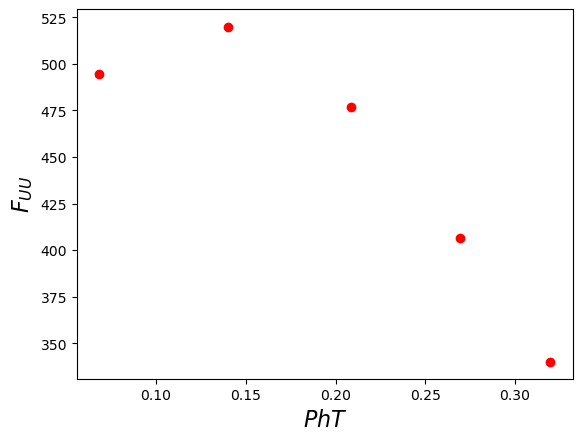

In [19]:
fig = plt.figure()
ax = fig.add_subplot()
PhT_1_1_3xs=[]
Fuu_1_1_3xs=[]
Fuu_1_1_3xs_stat=[]
Fuu_1_1_3xs_sys=[]
i_PhT_left = PhT_cuts[0]
for i_PhT in PhT_cuts[1:]:
    print(i_PhT_left,i_PhT)
    PhT_1_1s = df_3xs_1_1[df_3xs_1_1['pT']>=i_PhT_left][df_3xs_1_1['pT']<i_PhT]['pT'].tolist()
    Fuu_1_1s = df_3xs_1_1[df_3xs_1_1['pT']>=i_PhT_left][df_3xs_1_1['pT']<i_PhT]['value'].tolist()
    Fuu_1_1_stats = df_3xs_1_1[df_3xs_1_1['pT']>=i_PhT_left][df_3xs_1_1['pT']<i_PhT]['stat'].tolist()
    print(len(PhT_1_1s))
    
    if len(PhT_1_1s)>0:  
        #print('pT',pT_1_1s)
        #print('Fuu',Fuu_1_1s)
        #print('Fuu_stat',Fuu_1_1_stats)
        _Fuu_1_1 = get_weighted.Get_weighted_average(Fuu_1_1s,Fuu_1_1_stats)[0]
        _Fuu_1_1_stat = Factor_3xs*get_weighted.Get_weighted_average(Fuu_1_1s,Fuu_1_1_stats)[1]
        _pT_1_1= get_weighted.Get_weighted_average_phi(PhT_1_1s,Fuu_1_1_stats)[0]
        #print('_Fuu_1_1',_Fuu_1_1)
        #print('_pT',_pT_1_1)
        #print('_Fuu_stat',_Fuu_1_1_stat)
        Fuu_1_1_3xs.append(_Fuu_1_1)
        PhT_1_1_3xs.append(_pT_1_1)
        Fuu_1_1_3xs_stat.append(_Fuu_1_1_stat)
        Fuu_1_1_3xs_sys.append(0.05*_Fuu_1_1)
        #print(Fuu_1_1,pT_1_1)
        ax.plot([_pT_1_1,_pT_1_1],[_Fuu_1_1-_Fuu_1_1_stat,_Fuu_1_1+_Fuu_1_1_stat],color='red',marker='_')
    i_PhTleft = i_PhT
    #print('phileft',i_PhTleft)
plt.plot(PhT_1_1_3xs,Fuu_1_1_3xs,'ro')
plt.xlabel('$PhT$',fontsize=16)
plt.ylabel('$F_{UU}$',fontsize=16)

0 0.1
31
0 0.2
113
0 0.3
243
0 0.4
418
0 0.5
600


Text(0, 0.5, '$F_{UU}$')

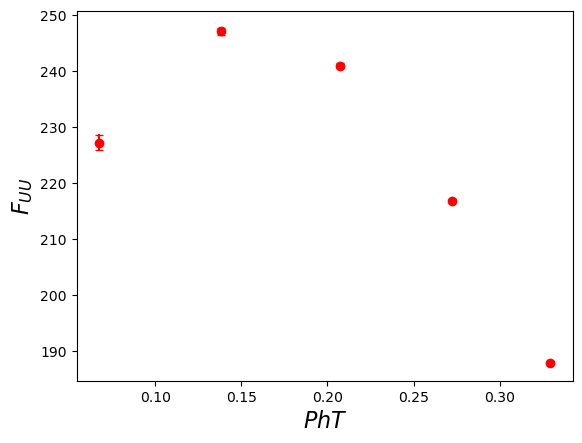

In [20]:
fig = plt.figure()
ax = fig.add_subplot()
PhT_1_2_3xs=[]
Fuu_1_2_3xs=[]
Fuu_1_2_3xs_stat=[]
Fuu_1_2_3xs_sys=[]
i_PhT_left = PhT_cuts[0]
for i_PhT in PhT_cuts[1:]:
    print(i_PhT_left,i_PhT)
    PhT_1_2s = df_3xs_1_2[df_3xs_1_2['pT']>=i_PhT_left][df_3xs_1_2['pT']<i_PhT]['pT'].tolist()
    Fuu_1_2s = df_3xs_1_2[df_3xs_1_2['pT']>=i_PhT_left][df_3xs_1_2['pT']<i_PhT]['value'].tolist()
    Fuu_1_2_stats = df_3xs_1_2[df_3xs_1_2['pT']>=i_PhT_left][df_3xs_1_2['pT']<i_PhT]['stat'].tolist()
    print(len(PhT_1_2s))
    
    if len(PhT_1_2s)>0:  
        #print('pT',pT_1_2s)
        #print('Fuu',Fuu_1_2s)
        #print('Fuu_stat',Fuu_1_2_stats)
        _Fuu_1_2 = get_weighted.Get_weighted_average(Fuu_1_2s,Fuu_1_2_stats)[0]
        _Fuu_1_2_stat = Factor_3xs*get_weighted.Get_weighted_average(Fuu_1_2s,Fuu_1_2_stats)[1]
        _pT_1_2= get_weighted.Get_weighted_average_phi(PhT_1_2s,Fuu_1_2_stats)[0]
        #print('_Fuu_1_2',_Fuu_1_2)
        #print('_pT',_pT_1_2)
        #print('_Fuu_stat',_Fuu_1_2_stat)
        Fuu_1_2_3xs.append(_Fuu_1_2)
        PhT_1_2_3xs.append(_pT_1_2)
        Fuu_1_2_3xs_stat.append(_Fuu_1_2_stat)
        Fuu_1_2_3xs_sys.append(0.05*_Fuu_1_2)
        #print(Fuu_1_2,pT_1_2)
        ax.plot([_pT_1_2,_pT_1_2],[_Fuu_1_2-_Fuu_1_2_stat,_Fuu_1_2+_Fuu_1_2_stat],color='red',marker='_')
    i_PhTleft = i_PhT
    #print('phileft',i_PhTleft)
plt.plot(PhT_1_2_3xs,Fuu_1_2_3xs,'ro')
plt.xlabel('$PhT$',fontsize=16)
plt.ylabel('$F_{UU}$',fontsize=16)

0 0.1
15
0 0.2
59
0 0.3
131
0 0.4
227
0 0.5
339


Text(0, 0.5, '$F_{UU}$')

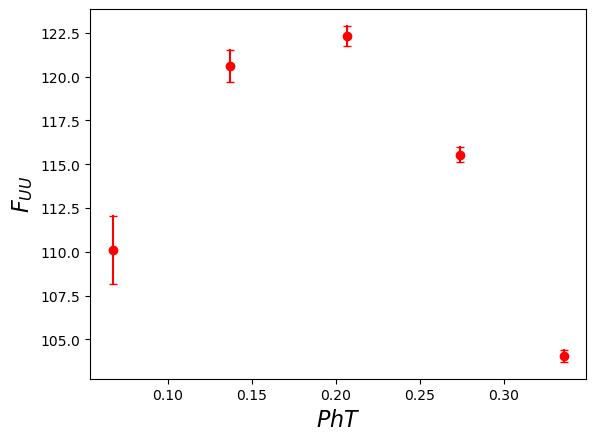

In [21]:
fig = plt.figure()
ax = fig.add_subplot()
PhT_1_3_3xs=[]
Fuu_1_3_3xs=[]
Fuu_1_3_3xs_stat=[]
Fuu_1_3_3xs_sys=[]
i_PhT_left = PhT_cuts[0]
for i_PhT in PhT_cuts[1:]:
    print(i_PhT_left,i_PhT)
    PhT_1_3s = df_3xs_1_3[df_3xs_1_3['pT']>=i_PhT_left][df_3xs_1_3['pT']<i_PhT]['pT'].tolist()
    Fuu_1_3s = df_3xs_1_3[df_3xs_1_3['pT']>=i_PhT_left][df_3xs_1_3['pT']<i_PhT]['value'].tolist()
    Fuu_1_3_stats = df_3xs_1_3[df_3xs_1_3['pT']>=i_PhT_left][df_3xs_1_3['pT']<i_PhT]['stat'].tolist()
    print(len(PhT_1_3s))
    
    if len(PhT_1_3s)>0:  
        #print('pT',pT_1_3s)
        #print('Fuu',Fuu_1_3s)
        #print('Fuu_stat',Fuu_1_3_stats)
        _Fuu_1_3 = get_weighted.Get_weighted_average(Fuu_1_3s,Fuu_1_3_stats)[0]
        _Fuu_1_3_stat = Factor_3xs*get_weighted.Get_weighted_average(Fuu_1_3s,Fuu_1_3_stats)[1]
        _pT_1_3= get_weighted.Get_weighted_average_phi(PhT_1_3s,Fuu_1_3_stats)[0]
        #print('_Fuu_1_3',_Fuu_1_3)
        #print('_pT',_pT_1_3)
        #print('_Fuu_stat',_Fuu_1_3_stat)
        Fuu_1_3_3xs.append(_Fuu_1_3)
        PhT_1_3_3xs.append(_pT_1_3)
        Fuu_1_3_3xs_stat.append(_Fuu_1_3_stat)
        Fuu_1_3_3xs_sys.append(0.05*_Fuu_1_3)
        #print(Fuu_1_3,pT_1_3)
        ax.plot([_pT_1_3,_pT_1_3],[_Fuu_1_3-_Fuu_1_3_stat,_Fuu_1_3+_Fuu_1_3_stat],color='red',marker='_')
    i_PhTleft = i_PhT
    #print('phileft',i_PhTleft)
plt.plot(PhT_1_3_3xs,Fuu_1_3_3xs,'ro')
plt.xlabel('$PhT$',fontsize=16)
plt.ylabel('$F_{UU}$',fontsize=16)

0 0.1
114
0 0.2
338
0 0.3
600
0 0.4
849
0 0.5
1063


Text(0, 0.5, '$F_{UU}$')

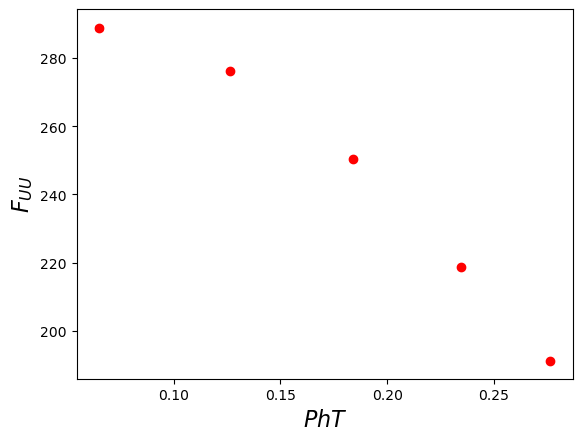

In [22]:
fig = plt.figure()
ax = fig.add_subplot()
PhT_2_1_3xs=[]
Fuu_2_1_3xs=[]
Fuu_2_1_3xs_stat=[]
Fuu_2_1_3xs_sys=[]
i_PhT_left = PhT_cuts[0]
for i_PhT in PhT_cuts[1:]:
    print(i_PhT_left,i_PhT)
    PhT_2_1s = df_3xs_2_1[df_3xs_2_1['pT']>=i_PhT_left][df_3xs_2_1['pT']<i_PhT]['pT'].tolist()
    Fuu_2_1s = df_3xs_2_1[df_3xs_2_1['pT']>=i_PhT_left][df_3xs_2_1['pT']<i_PhT]['value'].tolist()
    Fuu_2_1_stats = df_3xs_2_1[df_3xs_2_1['pT']>=i_PhT_left][df_3xs_2_1['pT']<i_PhT]['stat'].tolist()
    print(len(PhT_2_1s))
    
    if len(PhT_2_1s)>0:  
        #print('pT',pT_2_1s)
        #print('Fuu',Fuu_2_1s)
        #print('Fuu_stat',Fuu_2_1_stats)
        _Fuu_2_1 = get_weighted.Get_weighted_average(Fuu_2_1s,Fuu_2_1_stats)[0]
        _Fuu_2_1_stat = Factor_3xs*get_weighted.Get_weighted_average(Fuu_2_1s,Fuu_2_1_stats)[1]
        _pT_2_1= get_weighted.Get_weighted_average_phi(PhT_2_1s,Fuu_2_1_stats)[0]
        #print('_Fuu_2_1',_Fuu_2_1)
        #print('_pT',_pT_2_1)
        #print('_Fuu_stat',_Fuu_2_1_stat)
        Fuu_2_1_3xs.append(_Fuu_2_1)
        PhT_2_1_3xs.append(_pT_2_1)
        Fuu_2_1_3xs_stat.append(_Fuu_2_1_stat)
        Fuu_2_1_3xs_sys.append(0.05*_Fuu_2_1)
        #print(Fuu_2_1,pT_2_1)
        ax.plot([_pT_2_1,_pT_2_1],[_Fuu_2_1-_Fuu_2_1_stat,_Fuu_2_1+_Fuu_2_1_stat],color='red',marker='_')
    i_PhTleft = i_PhT
    #print('phileft',i_PhTleft)
plt.plot(PhT_2_1_3xs,Fuu_2_1_3xs,'ro')
plt.xlabel('$PhT$',fontsize=16)
plt.ylabel('$F_{UU}$',fontsize=16)

0 0.1
66
0 0.2
202
0 0.3
364
0 0.4
528
0 0.5
669


Text(0, 0.5, '$F_{UU}$')

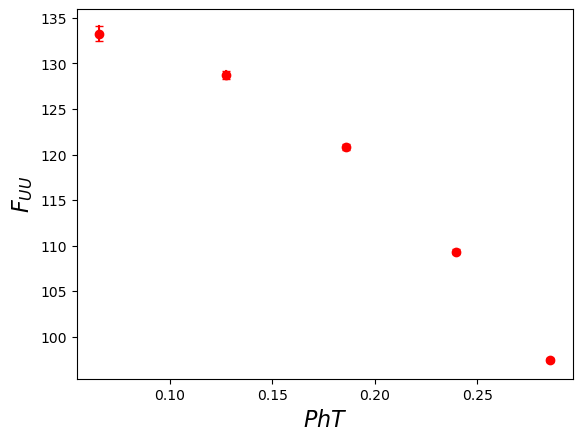

In [23]:
fig = plt.figure()
ax = fig.add_subplot()
PhT_2_2_3xs=[]
Fuu_2_2_3xs=[]
Fuu_2_2_3xs_stat=[]
Fuu_2_2_3xs_sys=[]
i_PhT_left = PhT_cuts[0]
for i_PhT in PhT_cuts[1:]:
    print(i_PhT_left,i_PhT)
    PhT_2_2s = df_3xs_2_2[df_3xs_2_2['pT']>=i_PhT_left][df_3xs_2_2['pT']<i_PhT]['pT'].tolist()
    Fuu_2_2s = df_3xs_2_2[df_3xs_2_2['pT']>=i_PhT_left][df_3xs_2_2['pT']<i_PhT]['value'].tolist()
    Fuu_2_2_stats = df_3xs_2_2[df_3xs_2_2['pT']>=i_PhT_left][df_3xs_2_2['pT']<i_PhT]['stat'].tolist()
    print(len(PhT_2_2s))
    
    if len(PhT_2_2s)>0:  
        #print('pT',pT_2_2s)
        #print('Fuu',Fuu_2_2s)
        #print('Fuu_stat',Fuu_2_2_stats)
        _Fuu_2_2 = get_weighted.Get_weighted_average(Fuu_2_2s,Fuu_2_2_stats)[0]
        _Fuu_2_2_stat = Factor_3xs*get_weighted.Get_weighted_average(Fuu_2_2s,Fuu_2_2_stats)[1]
        _pT_2_2= get_weighted.Get_weighted_average_phi(PhT_2_2s,Fuu_2_2_stats)[0]
        #print('_Fuu_2_2',_Fuu_2_2)
        #print('_pT',_pT_2_2)
        #print('_Fuu_stat',_Fuu_2_2_stat)
        Fuu_2_2_3xs.append(_Fuu_2_2)
        PhT_2_2_3xs.append(_pT_2_2)
        Fuu_2_2_3xs_stat.append(_Fuu_2_2_stat)
        Fuu_2_2_3xs_sys.append(0.05*_Fuu_2_2)
        #print(Fuu_2_2,pT_2_2)
        ax.plot([_pT_2_2,_pT_2_2],[_Fuu_2_2-_Fuu_2_2_stat,_Fuu_2_2+_Fuu_2_2_stat],color='red',marker='_')
    i_PhTleft = i_PhT
    #print('phileft',i_PhTleft)
plt.plot(PhT_2_2_3xs,Fuu_2_2_3xs,'ro')
plt.xlabel('$PhT$',fontsize=16)
plt.ylabel('$F_{UU}$',fontsize=16)

0 0.1
40
0 0.2
118
0 0.3
218
0 0.4
318
0 0.5
410


Text(0, 0.5, '$F_{UU}$')

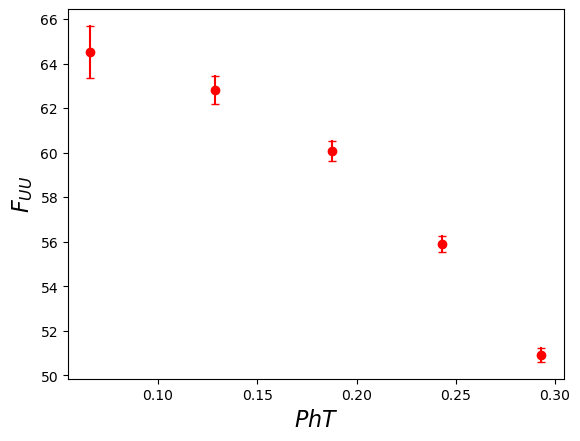

In [24]:
fig = plt.figure()
ax = fig.add_subplot()
PhT_2_3_3xs=[]
Fuu_2_3_3xs=[]
Fuu_2_3_3xs_stat=[]
Fuu_2_3_3xs_sys=[]
i_PhT_left = PhT_cuts[0]
for i_PhT in PhT_cuts[1:]:
    print(i_PhT_left,i_PhT)
    PhT_2_3s = df_3xs_2_3[df_3xs_2_3['pT']>=i_PhT_left][df_3xs_2_3['pT']<i_PhT]['pT'].tolist()
    Fuu_2_3s = df_3xs_2_3[df_3xs_2_3['pT']>=i_PhT_left][df_3xs_2_3['pT']<i_PhT]['value'].tolist()
    Fuu_2_3_stats = df_3xs_2_3[df_3xs_2_3['pT']>=i_PhT_left][df_3xs_2_3['pT']<i_PhT]['stat'].tolist()
    print(len(PhT_2_3s))
    
    if len(PhT_2_3s)>0:  
        #print('pT',pT_2_3s)
        #print('Fuu',Fuu_2_3s)
        #print('Fuu_stat',Fuu_2_3_stats)
        _Fuu_2_3 = get_weighted.Get_weighted_average(Fuu_2_3s,Fuu_2_3_stats)[0]
        _Fuu_2_3_stat = Factor_3xs*get_weighted.Get_weighted_average(Fuu_2_3s,Fuu_2_3_stats)[1]
        _pT_2_3= get_weighted.Get_weighted_average_phi(PhT_2_3s,Fuu_2_3_stats)[0]
        #print('_Fuu_2_3',_Fuu_2_3)
        #print('_pT',_pT_2_3)
        #print('_Fuu_stat',_Fuu_2_3_stat)
        Fuu_2_3_3xs.append(_Fuu_2_3)
        PhT_2_3_3xs.append(_pT_2_3)
        Fuu_2_3_3xs_stat.append(_Fuu_2_3_stat)
        Fuu_2_3_3xs_sys.append(0.05*_Fuu_2_3)
        #print(Fuu_2_3,pT_2_3)
        ax.plot([_pT_2_3,_pT_2_3],[_Fuu_2_3-_Fuu_2_3_stat,_Fuu_2_3+_Fuu_2_3_stat],color='red',marker='_')
    i_PhTleft = i_PhT
    #print('phileft',i_PhTleft)
plt.plot(PhT_2_3_3xs,Fuu_2_3_3xs,'ro')
plt.xlabel('$PhT$',fontsize=16)
plt.ylabel('$F_{UU}$',fontsize=16)

0 0.1
86
0 0.2
274
0 0.3
480
0 0.4
664
0 0.5
802


Text(0, 0.5, '$F_{UU}$')

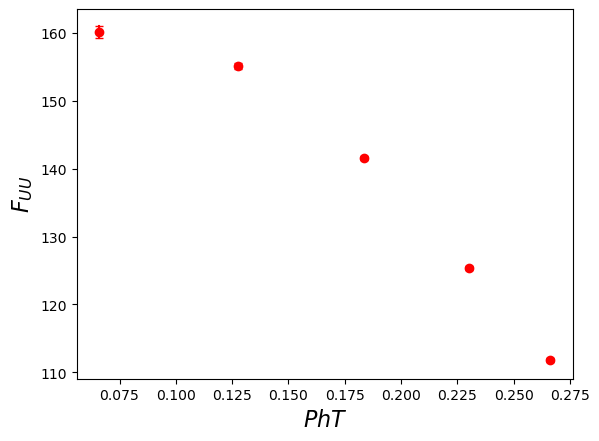

In [25]:
fig = plt.figure()
ax = fig.add_subplot()
PhT_3_1_3xs=[]
Fuu_3_1_3xs=[]
Fuu_3_1_3xs_stat=[]
Fuu_3_1_3xs_sys=[]
i_PhT_left = PhT_cuts[0]
for i_PhT in PhT_cuts[1:]:
    print(i_PhT_left,i_PhT)
    PhT_3_1s = df_3xs_3_1[df_3xs_3_1['pT']>=i_PhT_left][df_3xs_3_1['pT']<i_PhT]['pT'].tolist()
    Fuu_3_1s = df_3xs_3_1[df_3xs_3_1['pT']>=i_PhT_left][df_3xs_3_1['pT']<i_PhT]['value'].tolist()
    Fuu_3_1_stats = df_3xs_3_1[df_3xs_3_1['pT']>=i_PhT_left][df_3xs_3_1['pT']<i_PhT]['stat'].tolist()
    print(len(PhT_3_1s))
    
    if len(PhT_3_1s)>0:  
        #print('pT',pT_3_1s)
        #print('Fuu',Fuu_3_1s)
        #print('Fuu_stat',Fuu_3_1_stats)
        _Fuu_3_1 = get_weighted.Get_weighted_average(Fuu_3_1s,Fuu_3_1_stats)[0]
        _Fuu_3_1_stat = Factor_3xs*get_weighted.Get_weighted_average(Fuu_3_1s,Fuu_3_1_stats)[1]
        _pT_3_1= get_weighted.Get_weighted_average_phi(PhT_3_1s,Fuu_3_1_stats)[0]
        #print('_Fuu_3_1',_Fuu_3_1)
        #print('_pT',_pT_3_1)
        #print('_Fuu_stat',_Fuu_3_1_stat)
        Fuu_3_1_3xs.append(_Fuu_3_1)
        PhT_3_1_3xs.append(_pT_3_1)
        Fuu_3_1_3xs_stat.append(_Fuu_3_1_stat)
        Fuu_3_1_3xs_sys.append(0.05*_Fuu_3_1)
        #print(Fuu_3_1,pT_3_1)
        ax.plot([_pT_3_1,_pT_3_1],[_Fuu_3_1-_Fuu_3_1_stat,_Fuu_3_1+_Fuu_3_1_stat],color='red',marker='_')
    i_PhTleft = i_PhT
    #print('phileft',i_PhTleft)
plt.plot(PhT_3_1_3xs,Fuu_3_1_3xs,'ro')
plt.xlabel('$PhT$',fontsize=16)
plt.ylabel('$F_{UU}$',fontsize=16)

0 0.1
48
0 0.2
150
0 0.3
276
0 0.4
395
0 0.5
496


Text(0, 0.5, '$F_{UU}$')

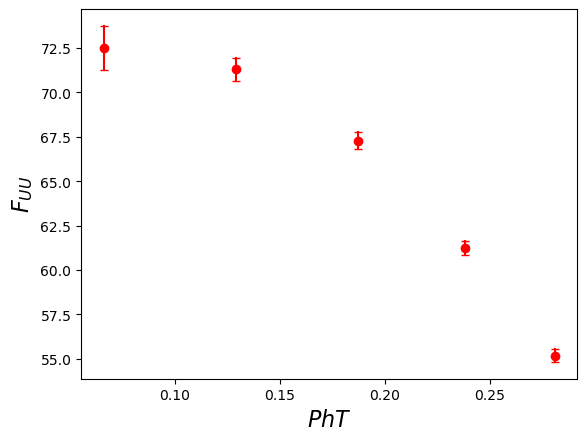

In [26]:
fig = plt.figure()
ax = fig.add_subplot()
PhT_3_2_3xs=[]
Fuu_3_2_3xs=[]
Fuu_3_2_3xs_stat=[]
Fuu_3_2_3xs_sys=[]
i_PhT_left = PhT_cuts[0]
for i_PhT in PhT_cuts[1:]:
    print(i_PhT_left,i_PhT)
    PhT_3_2s = df_3xs_3_2[df_3xs_3_2['pT']>=i_PhT_left][df_3xs_3_2['pT']<i_PhT]['pT'].tolist()
    Fuu_3_2s = df_3xs_3_2[df_3xs_3_2['pT']>=i_PhT_left][df_3xs_3_2['pT']<i_PhT]['value'].tolist()
    Fuu_3_2_stats = df_3xs_3_2[df_3xs_3_2['pT']>=i_PhT_left][df_3xs_3_2['pT']<i_PhT]['stat'].tolist()
    print(len(PhT_3_2s))
    
    if len(PhT_3_2s)>0:  
        #print('pT',pT_3_2s)
        #print('Fuu',Fuu_3_2s)
        #print('Fuu_stat',Fuu_3_2_stats)
        _Fuu_3_2 = get_weighted.Get_weighted_average(Fuu_3_2s,Fuu_3_2_stats)[0]
        _Fuu_3_2_stat = Factor_3xs*get_weighted.Get_weighted_average(Fuu_3_2s,Fuu_3_2_stats)[1]
        _pT_3_2= get_weighted.Get_weighted_average_phi(PhT_3_2s,Fuu_3_2_stats)[0]
        #print('_Fuu_3_2',_Fuu_3_2)
        #print('_pT',_pT_3_2)
        #print('_Fuu_stat',_Fuu_3_2_stat)
        Fuu_3_2_3xs.append(_Fuu_3_2)
        PhT_3_2_3xs.append(_pT_3_2)
        Fuu_3_2_3xs_stat.append(_Fuu_3_2_stat)
        Fuu_3_2_3xs_sys.append(0.05*_Fuu_3_2)
        #print(Fuu_3_2,pT_3_2)
        ax.plot([_pT_3_2,_pT_3_2],[_Fuu_3_2-_Fuu_3_2_stat,_Fuu_3_2+_Fuu_3_2_stat],color='red',marker='_')
    i_PhTleft = i_PhT
    #print('phileft',i_PhTleft)
plt.plot(PhT_3_2_3xs,Fuu_3_2_3xs,'ro')
plt.xlabel('$PhT$',fontsize=16)
plt.ylabel('$F_{UU}$',fontsize=16)

0 0.1
28
0 0.2
91
0 0.3
166
0 0.4
242
0 0.5
316


Text(0, 0.5, '$F_{UU}$')

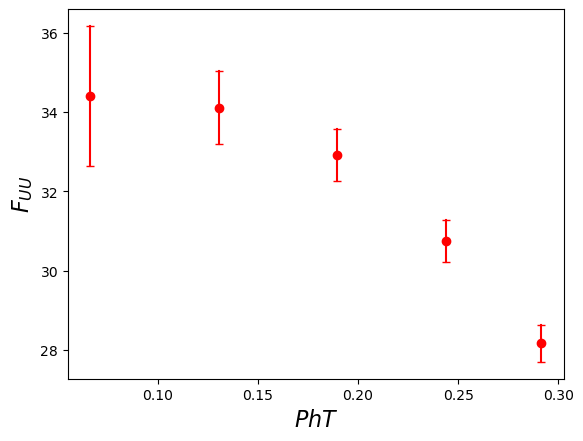

In [27]:
fig = plt.figure()
ax = fig.add_subplot()
PhT_3_3_3xs=[]
Fuu_3_3_3xs=[]
Fuu_3_3_3xs_stat=[]
Fuu_3_3_3xs_sys=[]
i_PhT_left = PhT_cuts[0]
for i_PhT in PhT_cuts[1:]:
    print(i_PhT_left,i_PhT)
    PhT_3_3s = df_3xs_3_3[df_3xs_3_3['pT']>=i_PhT_left][df_3xs_3_3['pT']<i_PhT]['pT'].tolist()
    Fuu_3_3s = df_3xs_3_3[df_3xs_3_3['pT']>=i_PhT_left][df_3xs_3_3['pT']<i_PhT]['value'].tolist()
    Fuu_3_3_stats = df_3xs_3_3[df_3xs_3_3['pT']>=i_PhT_left][df_3xs_3_3['pT']<i_PhT]['stat'].tolist()
    print(len(PhT_3_3s))
    
    if len(PhT_3_3s)>0:  
        #print('pT',pT_3_3s)
        #print('Fuu',Fuu_3_3s)
        #print('Fuu_stat',Fuu_3_3_stats)
        _Fuu_3_3 = get_weighted.Get_weighted_average(Fuu_3_3s,Fuu_3_3_stats)[0]
        _Fuu_3_3_stat = Factor_3xs*get_weighted.Get_weighted_average(Fuu_3_3s,Fuu_3_3_stats)[1]
        _pT_3_3= get_weighted.Get_weighted_average_phi(PhT_3_3s,Fuu_3_3_stats)[0]
        #print('_Fuu_3_3',_Fuu_3_3)
        #print('_pT',_pT_3_3)
        #print('_Fuu_stat',_Fuu_3_3_stat)
        Fuu_3_3_3xs.append(_Fuu_3_3)
        PhT_3_3_3xs.append(_pT_3_3)
        Fuu_3_3_3xs_stat.append(_Fuu_3_3_stat)
        Fuu_3_3_3xs_sys.append(0.05*_Fuu_3_3)
        #print(Fuu_3_3,pT_3_3)
        ax.plot([_pT_3_3,_pT_3_3],[_Fuu_3_3-_Fuu_3_3_stat,_Fuu_3_3+_Fuu_3_3_stat],color='red',marker='_')
    i_PhTleft = i_PhT
    #print('phileft',i_PhTleft)
plt.plot(PhT_3_3_3xs,Fuu_3_3_3xs,'ro')
plt.xlabel('$PhT$',fontsize=16)
plt.ylabel('$F_{UU}$',fontsize=16)

0 0.1
35
0 0.2
105
0 0.3
189
0 0.4
254
0 0.5
299


Text(0, 0.5, '$F_{UU}$')

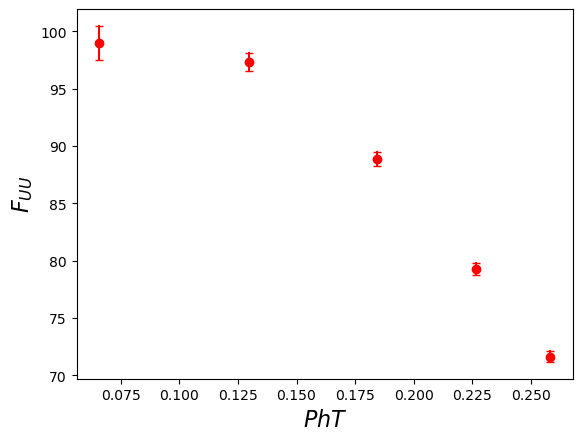

In [28]:
fig = plt.figure()
ax = fig.add_subplot()
PhT_4_1_3xs=[]
Fuu_4_1_3xs=[]
Fuu_4_1_3xs_stat=[]
Fuu_4_1_3xs_sys=[]
i_PhT_left = PhT_cuts[0]
for i_PhT in PhT_cuts[1:]:
    print(i_PhT_left,i_PhT)
    PhT_4_1s = df_3xs_4_1[df_3xs_4_1['pT']>=i_PhT_left][df_3xs_4_1['pT']<i_PhT]['pT'].tolist()
    Fuu_4_1s = df_3xs_4_1[df_3xs_4_1['pT']>=i_PhT_left][df_3xs_4_1['pT']<i_PhT]['value'].tolist()
    Fuu_4_1_stats = df_3xs_4_1[df_3xs_4_1['pT']>=i_PhT_left][df_3xs_4_1['pT']<i_PhT]['stat'].tolist()
    print(len(PhT_4_1s))
    
    if len(PhT_4_1s)>0:  
        #print('pT',pT_4_1s)
        #print('Fuu',Fuu_4_1s)
        #print('Fuu_stat',Fuu_4_1_stats)
        _Fuu_4_1 = get_weighted.Get_weighted_average(Fuu_4_1s,Fuu_4_1_stats)[0]
        _Fuu_4_1_stat = Factor_3xs*get_weighted.Get_weighted_average(Fuu_4_1s,Fuu_4_1_stats)[1]
        _pT_4_1= get_weighted.Get_weighted_average_phi(PhT_4_1s,Fuu_4_1_stats)[0]
        #print('_Fuu_4_1',_Fuu_4_1)
        #print('_pT',_pT_4_1)
        #print('_Fuu_stat',_Fuu_4_1_stat)
        Fuu_4_1_3xs.append(_Fuu_4_1)
        PhT_4_1_3xs.append(_pT_4_1)
        Fuu_4_1_3xs_stat.append(_Fuu_4_1_stat)
        Fuu_4_1_3xs_sys.append(0.05*_Fuu_4_1)
        #print(Fuu_4_1,pT_4_1)
        ax.plot([_pT_4_1,_pT_4_1],[_Fuu_4_1-_Fuu_4_1_stat,_Fuu_4_1+_Fuu_4_1_stat],color='red',marker='_')
    i_PhTleft = i_PhT
    #print('phileft',i_PhTleft)
plt.plot(PhT_4_1_3xs,Fuu_4_1_3xs,'ro')
plt.xlabel('$PhT$',fontsize=16)
plt.ylabel('$F_{UU}$',fontsize=16)

0 0.1
19
0 0.2
61
0 0.3
113
0 0.4
159
0 0.5
195


Text(0, 0.5, '$F_{UU}$')

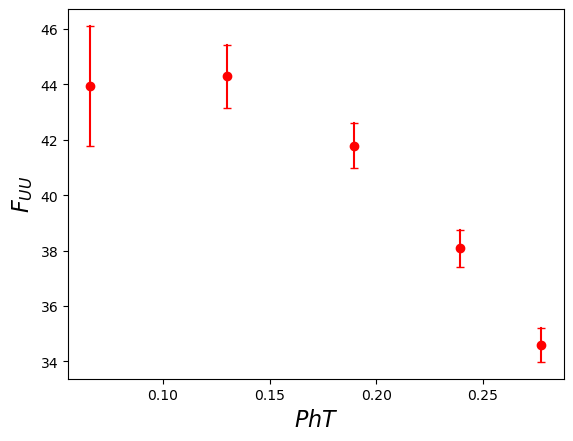

In [29]:
fig = plt.figure()
ax = fig.add_subplot()
PhT_4_2_3xs=[]
Fuu_4_2_3xs=[]
Fuu_4_2_3xs_stat=[]
Fuu_4_2_3xs_sys=[]
i_PhT_left = PhT_cuts[0]
for i_PhT in PhT_cuts[1:]:
    print(i_PhT_left,i_PhT)
    PhT_4_2s = df_3xs_4_2[df_3xs_4_2['pT']>=i_PhT_left][df_3xs_4_2['pT']<i_PhT]['pT'].tolist()
    Fuu_4_2s = df_3xs_4_2[df_3xs_4_2['pT']>=i_PhT_left][df_3xs_4_2['pT']<i_PhT]['value'].tolist()
    Fuu_4_2_stats = df_3xs_4_2[df_3xs_4_2['pT']>=i_PhT_left][df_3xs_4_2['pT']<i_PhT]['stat'].tolist()
    print(len(PhT_4_2s))
    
    if len(PhT_4_2s)>0:  
        #print('pT',pT_4_2s)
        #print('Fuu',Fuu_4_2s)
        #print('Fuu_stat',Fuu_4_2_stats)
        _Fuu_4_2 = get_weighted.Get_weighted_average(Fuu_4_2s,Fuu_4_2_stats)[0]
        _Fuu_4_2_stat = Factor_3xs*get_weighted.Get_weighted_average(Fuu_4_2s,Fuu_4_2_stats)[1]
        _pT_4_2= get_weighted.Get_weighted_average_phi(PhT_4_2s,Fuu_4_2_stats)[0]
        #print('_Fuu_4_2',_Fuu_4_2)
        #print('_pT',_pT_4_2)
        #print('_Fuu_stat',_Fuu_4_2_stat)
        Fuu_4_2_3xs.append(_Fuu_4_2)
        PhT_4_2_3xs.append(_pT_4_2)
        Fuu_4_2_3xs_stat.append(_Fuu_4_2_stat)
        Fuu_4_2_3xs_sys.append(0.05*_Fuu_4_2)
        #print(Fuu_4_2,pT_4_2)
        ax.plot([_pT_4_2,_pT_4_2],[_Fuu_4_2-_Fuu_4_2_stat,_Fuu_4_2+_Fuu_4_2_stat],color='red',marker='_')
    i_PhTleft = i_PhT
    #print('phileft',i_PhTleft)
plt.plot(PhT_4_2_3xs,Fuu_4_2_3xs,'ro')
plt.xlabel('$PhT$',fontsize=16)
plt.ylabel('$F_{UU}$',fontsize=16)

0 0.1
10
0 0.2
36
0 0.3
67
0 0.4
98
0 0.5
124


Text(0, 0.5, '$F_{UU}$')

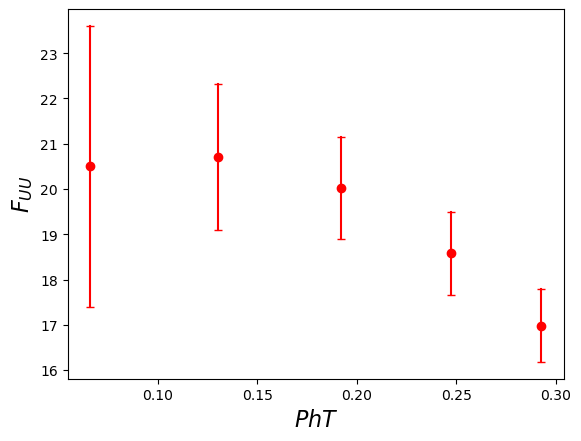

In [30]:
fig = plt.figure()
ax = fig.add_subplot()
PhT_4_3_3xs=[]
Fuu_4_3_3xs=[]
Fuu_4_3_3xs_stat=[]
Fuu_4_3_3xs_sys=[]
i_PhT_left = PhT_cuts[0]
for i_PhT in PhT_cuts[1:]:
    print(i_PhT_left,i_PhT)
    PhT_4_3s = df_3xs_4_3[df_3xs_4_3['pT']>=i_PhT_left][df_3xs_4_3['pT']<i_PhT]['pT'].tolist()
    Fuu_4_3s = df_3xs_4_3[df_3xs_4_3['pT']>=i_PhT_left][df_3xs_4_3['pT']<i_PhT]['value'].tolist()
    Fuu_4_3_stats = df_3xs_4_3[df_3xs_4_3['pT']>=i_PhT_left][df_3xs_4_3['pT']<i_PhT]['stat'].tolist()
    print(len(PhT_4_3s))
    
    if len(PhT_4_3s)>0:  
        #print('pT',pT_4_3s)
        #print('Fuu',Fuu_4_3s)
        #print('Fuu_stat',Fuu_4_3_stats)
        _Fuu_4_3 = get_weighted.Get_weighted_average(Fuu_4_3s,Fuu_4_3_stats)[0]
        _Fuu_4_3_stat = Factor_3xs*get_weighted.Get_weighted_average(Fuu_4_3s,Fuu_4_3_stats)[1]
        _pT_4_3= get_weighted.Get_weighted_average_phi(PhT_4_3s,Fuu_4_3_stats)[0]
        #print('_Fuu_4_3',_Fuu_4_3)
        #print('_pT',_pT_4_3)
        #print('_Fuu_stat',_Fuu_4_3_stat)
        Fuu_4_3_3xs.append(_Fuu_4_3)
        PhT_4_3_3xs.append(_pT_4_3)
        Fuu_4_3_3xs_stat.append(_Fuu_4_3_stat)
        Fuu_4_3_3xs_sys.append(0.05*_Fuu_4_3)
        #print(Fuu_4_3,pT_4_3)
        ax.plot([_pT_4_3,_pT_4_3],[_Fuu_4_3-_Fuu_4_3_stat,_Fuu_4_3+_Fuu_4_3_stat],color='red',marker='_')
    i_PhTleft = i_PhT
    #print('phileft',i_PhTleft)
plt.plot(PhT_4_3_3xs,Fuu_4_3_3xs,'ro')
plt.xlabel('$PhT$',fontsize=16)
plt.ylabel('$F_{UU}$',fontsize=16)

In [31]:
def get_stat(f):
    mean_f=np.sum(f)/len(f)
    #print(mean_f)
    #print(f-mean_f)
    err_f = (np.sum((f-mean_f)**2)/len(f))**0.5
    return mean_f,err_f


In [32]:
pdf_p=lhapdf.mkPDFs('MAPFF10NLOPIp')
pdf_m=lhapdf.mkPDFs('MAPFF10NLOPIm')

LHAPDF 6.5.3 loading all 201 PDFs in set MAPFF10NLOPIp
MAPFF10NLOPIp, version 2; 201 PDF members
LHAPDF 6.5.3 loading all 201 PDFs in set MAPFF10NLOPIm
MAPFF10NLOPIm, version 2; 201 PDF members


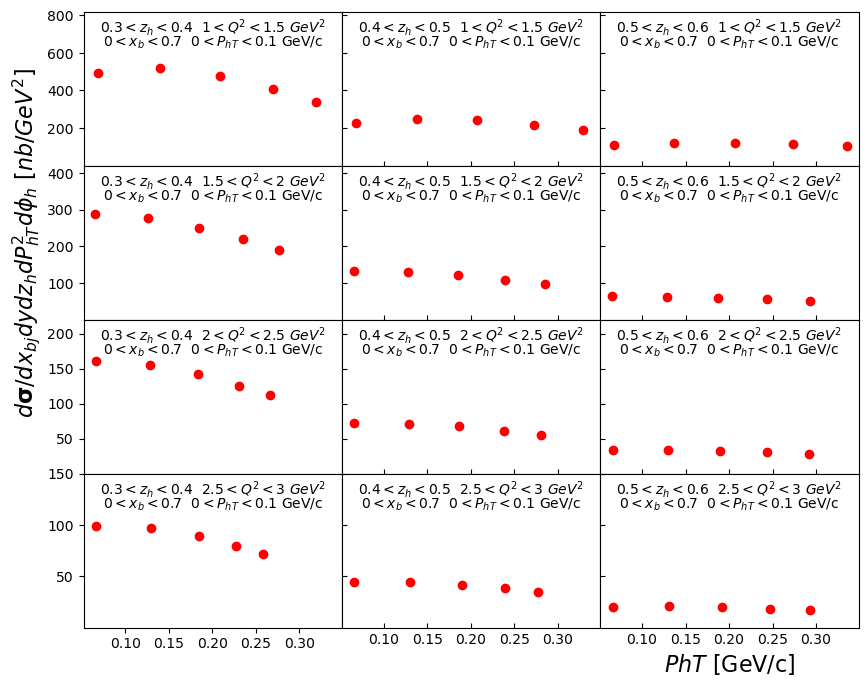

In [29]:
fig, axs = plt.subplots(4,3,figsize=(10,8),sharex=True)
fig.subplots_adjust(hspace=0)
fig.subplots_adjust(wspace=0)

plt.xlabel('$PhT$ [GeV/c]',fontsize=16)
#over large
Y_first_max=820;Y_second_max=420;Y_third_max=220;Y_fourth_max = 150
#Y_first_max=820;Y_second_max=420;Y_third_max=220;Y_fourth_max = 150
#Y_first_max=200;Y_second_max=100;Y_third_max=50;Y_fourth_max = 20
#large
#Y_first_max=0.18;Y_second_max=0.07;Y_third_max=0.024;Y_fourth_max = 0.012
#small2
#Y_first_max=0.04;Y_second_max=0.03;Y_third_max=0.02;Y_fourth_max = 0.012
#small
#Y_first_max=0.09;Y_second_max=0.04;Y_third_max=0.01;Y_fourth_max=0.006


axs[0][0].errorbar(PhT_1_1_3xs,Fuu_1_1_3xs,Fuu_1_1_3xs_stat,fmt='ro')
#axs[0][0].fill_between(phih_1_1_3xs,np.asarray(0),np.asarray(0)+np.asarray(Fuu_1_1_3xs_sys),color='red',hatch='\\\\\\\\',alpha=0.25,linewidth=0)
axs[0][0].set_ylim(0.0002,Y_first_max)
axs[0][0].text(0.5,0.9,r'${}<z_h<{}\ \  {}<Q^2<{}$ $GeV^2$'.format(z_cuts[0],z_cuts[1],Q2_cuts[0],Q2_cuts[1]), horizontalalignment='center', verticalalignment='center', transform=axs[0][0].transAxes)
axs[0][0].text(0.5,0.8,r'${}<x_{{b}}<{}\ \  {}<P_{{hT}}<{}$ GeV/c'.format(xbj_cuts[0],xbj_cuts[1],PhT_cuts[0],PhT_cuts[1]), horizontalalignment='center', verticalalignment='center', transform=axs[0][0].transAxes)


axs[0][1].errorbar(PhT_1_2_3xs,Fuu_1_2_3xs,Fuu_1_2_3xs_stat,fmt='ro')
#axs[0][1].fill_between(phih_1_2_3xs,np.asarray(0),np.asarray(0)+np.asarray(Fuu_1_2_3xs_sys),color='red',hatch='\\\\\\\\',alpha=0.25,linewidth=0)
axs[0][1].set_ylim(0.0002,Y_first_max)
axs[0][1].tick_params(direction='in',labelbottom=False,labelleft=False)
axs[0][1].text(0.5,0.9,r'${}<z_h<{}\ \ {}<Q^2<{}$ $GeV^2$'.format(z_cuts[1],z_cuts[2],Q2_cuts[0],Q2_cuts[1]), horizontalalignment='center', verticalalignment='center', transform=axs[0][1].transAxes)
axs[0][1].text(0.5,0.8,r'${}<x_{{b}}<{}\ \ {}<P_{{hT}}<{}$ GeV/c'.format(xbj_cuts[0],xbj_cuts[1],PhT_cuts[0],PhT_cuts[1]), horizontalalignment='center', verticalalignment='center', transform=axs[0][1].transAxes)

axs[0][2].errorbar(PhT_1_3_3xs,Fuu_1_3_3xs,Fuu_1_3_3xs_stat,fmt='ro')
#axs[0][2].fill_between(phih_1_3_3xs,np.asarray(0),np.asarray(0)+np.asarray(Fuu_1_3_3xs_sys),color='red',hatch='\\\\\\\\',alpha=0.25,linewidth=0)
axs[0][2].set_ylim(0.0002,Y_first_max)
axs[0][2].tick_params(direction='in',labelbottom=False,labelleft=False)
axs[0][2].text(0.5,0.9,r'${}<z_h<{}\ \   {}<Q^2<{}$ $GeV^2$'.format(z_cuts[2],z_cuts[3],Q2_cuts[0],Q2_cuts[1]), horizontalalignment='center', verticalalignment='center', transform=axs[0][2].transAxes)
axs[0][2].text(0.5,0.8,r'${}<x_{{b}}<{}\ \  {}<P_{{hT}}<{}$ GeV/c'.format(xbj_cuts[0],xbj_cuts[1],PhT_cuts[0],PhT_cuts[1]), horizontalalignment='center', verticalalignment='center', transform=axs[0][2].transAxes)

axs[1][0].errorbar(PhT_2_1_3xs,Fuu_2_1_3xs,Fuu_2_1_3xs_stat,fmt='ro')
#axs[1][0].fill_between(phih_2_1_3xs,np.asarray(0),np.asarray(0)+np.asarray(Fuu_2_1_3xs_sys),color='red',hatch='\\\\\\\\',alpha=0.25,linewidth=0)
axs[1][0].set_ylim(0.0002,Y_second_max)
axs[1][0].text(0.5,0.9,r'${}<z_h<{}\ \  {}<Q^2<{}$ $GeV^2$'.format(z_cuts[0],z_cuts[1],Q2_cuts[1],Q2_cuts[2]), horizontalalignment='center', verticalalignment='center', transform=axs[1][0].transAxes)
axs[1][0].text(0.5,0.8,r'${}<x_{{b}}<{}\ \  {}<P_{{hT}}<{}$ GeV/c'.format(xbj_cuts[0],xbj_cuts[1],PhT_cuts[0],PhT_cuts[1]), horizontalalignment='center', verticalalignment='center', transform=axs[1][0].transAxes)

axs[1][1].errorbar(PhT_2_2_3xs,Fuu_2_2_3xs,Fuu_2_2_3xs_stat,fmt='ro')
#axs[1][1].fill_between(phih_2_2_3xs,np.asarray(0),np.asarray(0)+np.asarray(Fuu_2_2_3xs_sys),color='red',hatch='\\\\\\\\',alpha=0.25,linewidth=0)
axs[1][1].set_ylim(0.0002,Y_second_max)
axs[1][1].tick_params(direction='in',labelbottom=False,labelleft=False)
axs[1][1].text(0.5,0.9,r'${}<z_h<{}\ \ {}<Q^2<{}$ $GeV^2$'.format(z_cuts[1],z_cuts[2],Q2_cuts[1],Q2_cuts[2]), horizontalalignment='center', verticalalignment='center', transform=axs[1][1].transAxes)
axs[1][1].text(0.5,0.8,r'${}<x_{{b}}<{}\ \ {}<P_{{hT}}<{}$ GeV/c'.format(xbj_cuts[0],xbj_cuts[1],PhT_cuts[0],PhT_cuts[1]), horizontalalignment='center', verticalalignment='center', transform=axs[1][1].transAxes)

axs[1][2].errorbar(PhT_2_3_3xs,Fuu_2_3_3xs,Fuu_2_3_3xs_stat,fmt='ro')
#axs[1][2].fill_between(phih_2_3_3xs,np.asarray(0),np.asarray(0)+np.asarray(Fuu_2_3_3xs_sys),color='red',hatch='\\\\\\\\',alpha=0.25,linewidth=0)
axs[1][2].set_ylim(0.0002,Y_second_max)
axs[1][2].tick_params(direction='in',labelbottom=False,labelleft=False)
axs[1][2].text(0.5,0.9,r'${}<z_h<{}\ \   {}<Q^2<{}$ $GeV^2$'.format(z_cuts[2],z_cuts[3],Q2_cuts[1],Q2_cuts[2]), horizontalalignment='center', verticalalignment='center', transform=axs[1][2].transAxes)
axs[1][2].text(0.5,0.8,r'${}<x_{{b}}<{}\ \  {}<P_{{hT}}<{}$ GeV/c'.format(xbj_cuts[0],xbj_cuts[1],PhT_cuts[0],PhT_cuts[1]), horizontalalignment='center', verticalalignment='center', transform=axs[1][2].transAxes)

axs[2][0].errorbar(PhT_3_1_3xs,Fuu_3_1_3xs,Fuu_3_1_3xs_stat,fmt='ro')
#axs[2][0].fill_between(phih_3_1_3xs,np.asarray(0),np.asarray(0)+np.asarray(Fuu_3_1_3xs_sys),color='red',hatch='\\\\\\\\',alpha=0.25,linewidth=0)
axs[2][0].set_ylim(0.0002,Y_third_max)
axs[2][0].text(0.5,0.9,r'${}<z_h<{}\ \  {}<Q^2<{}$ $GeV^2$'.format(z_cuts[0],z_cuts[1],Q2_cuts[2],Q2_cuts[3]), horizontalalignment='center', verticalalignment='center', transform=axs[2][0].transAxes)
axs[2][0].text(0.5,0.8,r'${}<x_{{b}}<{}\ \  {}<P_{{hT}}<{}$ GeV/c'.format(xbj_cuts[0],xbj_cuts[1],PhT_cuts[0],PhT_cuts[1]), horizontalalignment='center', verticalalignment='center', transform=axs[2][0].transAxes)

axs[2][1].errorbar(PhT_3_2_3xs,Fuu_3_2_3xs,Fuu_3_2_3xs_stat,fmt='ro')
#axs[2][1].fill_between(phih_3_2_3xs,np.asarray(0),np.asarray(0)+np.asarray(Fuu_3_2_3xs_sys),color='red',hatch='\\\\\\\\',alpha=0.25,linewidth=0)
axs[2][1].set_ylim(0.0002,Y_third_max)
axs[2][1].tick_params(direction='in',labelbottom=False,labelleft=False)
axs[2][1].text(0.5,0.9,r'${}<z_h<{}\ \ {}<Q^2<{}$ $GeV^2$'.format(z_cuts[1],z_cuts[2],Q2_cuts[2],Q2_cuts[3]), horizontalalignment='center', verticalalignment='center', transform=axs[2][1].transAxes)
axs[2][1].text(0.5,0.8,r'${}<x_{{b}}<{}\ \ {}<P_{{hT}}<{}$ GeV/c'.format(xbj_cuts[0],xbj_cuts[1],PhT_cuts[0],PhT_cuts[1]), horizontalalignment='center', verticalalignment='center', transform=axs[2][1].transAxes)

axs[2][2].errorbar(PhT_3_3_3xs,Fuu_3_3_3xs,Fuu_3_3_3xs_stat,fmt='ro')
#axs[2][2].fill_between(phih_3_3_3xs,np.asarray(0),np.asarray(0)+np.asarray(Fuu_3_3_3xs_sys),color='red',hatch='\\\\\\\\',alpha=0.25,linewidth=0)
axs[2][2].set_ylim(0.0002,Y_third_max)
axs[2][2].tick_params(direction='in',labelbottom=False,labelleft=False)
axs[2][2].text(0.5,0.9,r'${}<z_h<{}\ \   {}<Q^2<{}$ $GeV^2$'.format(z_cuts[2],z_cuts[3],Q2_cuts[2],Q2_cuts[3]), horizontalalignment='center', verticalalignment='center', transform=axs[2][2].transAxes)
axs[2][2].text(0.5,0.8,r'${}<x_{{b}}<{}\ \  {}<P_{{hT}}<{}$ GeV/c'.format(xbj_cuts[0],xbj_cuts[1],PhT_cuts[0],PhT_cuts[1]), horizontalalignment='center', verticalalignment='center', transform=axs[2][2].transAxes)

axs[3][0].errorbar(PhT_4_1_3xs,Fuu_4_1_3xs,Fuu_4_1_3xs_stat,fmt='ro')
#axs[3][0].fill_between(phih_4_1_3xs,np.asarray(0),np.asarray(0)+np.asarray(Fuu_4_1_3xs_sys),color='red',hatch='\\\\\\\\',alpha=0.25,linewidth=0)
axs[3][0].set_ylim(0.0002,Y_fourth_max)
#axs[3][0].tick_params(direction='in',labelbottom=False,labelleft=False)
axs[3][0].text(0.5,0.9,r'${}<z_h<{}\ \  {}<Q^2<{}$ $GeV^2$'.format(z_cuts[0],z_cuts[1],Q2_cuts[3],Q2_cuts[4]), horizontalalignment='center', verticalalignment='center', transform=axs[3][0].transAxes)
axs[3][0].text(0.5,0.8,r'${}<x_{{b}}<{}\ \  {}<P_{{hT}}<{}$ GeV/c'.format(xbj_cuts[0],xbj_cuts[1],PhT_cuts[0],PhT_cuts[1]), horizontalalignment='center', verticalalignment='center', transform=axs[3][0].transAxes)

axs[3][1].errorbar(PhT_4_2_3xs,Fuu_4_2_3xs,Fuu_4_2_3xs_stat,fmt='ro')
#axs[3][1].fill_between(phih_4_2_3xs,np.asarray(0),np.asarray(0)+np.asarray(Fuu_4_2_3xs_sys),color='red',hatch='\\\\\\\\',alpha=0.25,linewidth=0)
axs[3][1].set_ylim(0.0002,Y_fourth_max)
axs[3][1].tick_params(direction='in',labelleft=False)
axs[3][1].text(0.5,0.9,r'${}<z_h<{}\ \ {}<Q^2<{}$ $GeV^2$'.format(z_cuts[1],z_cuts[2],Q2_cuts[3],Q2_cuts[4]), horizontalalignment='center', verticalalignment='center', transform=axs[3][1].transAxes)
axs[3][1].text(0.5,0.8,r'${}<x_{{b}}<{}\ \ {}<P_{{hT}}<{}$ GeV/c'.format(xbj_cuts[0],xbj_cuts[1],PhT_cuts[0],PhT_cuts[1]), horizontalalignment='center', verticalalignment='center', transform=axs[3][1].transAxes)

axs[3][2].errorbar(PhT_4_3_3xs,Fuu_4_3_3xs,Fuu_4_3_3xs_stat,fmt='ro')
#axs[3][2].fill_between(phih_4_3_3xs,np.asarray(0),np.asarray(0)+np.asarray(Fuu_4_3_3xs_sys),color='red',hatch='\\\\\\\\',alpha=0.25,linewidth=0)
axs[3][2].set_ylim(0.0002,Y_fourth_max)
axs[3][2].tick_params(direction='in',labelleft=False)
axs[3][2].text(0.5,0.9,r'${}<z_h<{}\ \   {}<Q^2<{}$ $GeV^2$'.format(z_cuts[2],z_cuts[3],Q2_cuts[3],Q2_cuts[4]), horizontalalignment='center', verticalalignment='center', transform=axs[3][2].transAxes)
axs[3][2].text(0.5,0.8,r'${}<x_{{b}}<{}\ \  {}<P_{{hT}}<{}$ GeV/c'.format(xbj_cuts[0],xbj_cuts[1],PhT_cuts[0],PhT_cuts[1]), horizontalalignment='center', verticalalignment='center', transform=axs[3][2].transAxes)

axs[1][0].set_ylabel(r'${d \bf{\sigma}}/{dx_{bj}dydz_hdP^2_{hT}d\phi_h}$ [$nb/GeV^2$]',fontsize=16)


#plt.show()
plt.savefig('../Unpol_proposal/Materials/results/Fuu_Pt.pdf')

In [30]:
def least_square(kt2,pt2):
    least_square = 0                                                                                                                                                              
    for i_z in range(1,len(z_cuts)):
        for i_Q2 in range(1,len(Q2_cuts)):
            #print(z_cuts[i_z-1],z_cuts[i_z])
            #print(Q2_cuts[i_Q2-1],Q2_cuts[i_Q2])
            xbjs = df_3xs_zQ2[(df_3xs_zQ2['z']>z_cuts[i_z-1])&(df_3xs_zQ2['z']<z_cuts[i_z])&(df_3xs_zQ2['Q2']>Q2_cuts[i_Q2-1])&(df_3xs_zQ2['Q2']<Q2_cuts[i_Q2])]['x'].to_list()
            phihs = df_3xs_zQ2[(df_3xs_zQ2['z']>z_cuts[i_z-1])&(df_3xs_zQ2['z']<z_cuts[i_z])&(df_3xs_zQ2['Q2']>Q2_cuts[i_Q2-1])&(df_3xs_zQ2['Q2']<Q2_cuts[i_Q2])]['phih'].to_list()
            ys = df_3xs_zQ2[(df_3xs_zQ2['z']>z_cuts[i_z-1])&(df_3xs_zQ2['z']<z_cuts[i_z])&(df_3xs_zQ2['Q2']>Q2_cuts[i_Q2-1])&(df_3xs_zQ2['Q2']<Q2_cuts[i_Q2])]['y'].to_list()
            zs = df_3xs_zQ2[(df_3xs_zQ2['z']>z_cuts[i_z-1])&(df_3xs_zQ2['z']<z_cuts[i_z])&(df_3xs_zQ2['Q2']>Q2_cuts[i_Q2-1])&(df_3xs_zQ2['Q2']<Q2_cuts[i_Q2])]['z'].to_list()
            Q2s = df_3xs_zQ2[(df_3xs_zQ2['z']>z_cuts[i_z-1])&(df_3xs_zQ2['z']<z_cuts[i_z])&(df_3xs_zQ2['Q2']>Q2_cuts[i_Q2-1])&(df_3xs_zQ2['Q2']<Q2_cuts[i_Q2])]['Q2'].to_list()
            pTs = df_3xs_zQ2[(df_3xs_zQ2['z']>z_cuts[i_z-1])&(df_3xs_zQ2['z']<z_cuts[i_z])&(df_3xs_zQ2['Q2']>Q2_cuts[i_Q2-1])&(df_3xs_zQ2['Q2']<Q2_cuts[i_Q2])]['pT'].to_list()
            values = df_3xs_zQ2[(df_3xs_zQ2['z']>z_cuts[i_z-1])&(df_3xs_zQ2['z']<z_cuts[i_z])&(df_3xs_zQ2['Q2']>Q2_cuts[i_Q2-1])&(df_3xs_zQ2['Q2']<Q2_cuts[i_Q2])]['value'].to_list()
            stats = df_3xs_zQ2[(df_3xs_zQ2['z']>z_cuts[i_z-1])&(df_3xs_zQ2['z']<z_cuts[i_z])&(df_3xs_zQ2['Q2']>Q2_cuts[i_Q2-1])&(df_3xs_zQ2['Q2']<Q2_cuts[i_Q2])]['stat'].to_list()
            target = df_3xs_zQ2[(df_3xs_zQ2['z']>z_cuts[i_z-1])&(df_3xs_zQ2['z']<z_cuts[i_z])&(df_3xs_zQ2['Q2']>Q2_cuts[i_Q2-1])&(df_3xs_zQ2['Q2']<Q2_cuts[i_Q2])]['target'].to_list()[0]
            hadron = df_3xs_zQ2[(df_3xs_zQ2['z']>z_cuts[i_z-1])&(df_3xs_zQ2['z']<z_cuts[i_z])&(df_3xs_zQ2['Q2']>Q2_cuts[i_Q2-1])&(df_3xs_zQ2['Q2']<Q2_cuts[i_Q2])]['hadron'].to_list()[0]
            xbj = get_weighted.Get_weighted_average_phi(xbjs,stats)[0]
            phih = get_weighted.Get_weighted_average_phi(phihs,stats)[0]
            y = get_weighted.Get_weighted_average_phi(ys,stats)[0]
            z = get_weighted.Get_weighted_average_phi(zs,stats)[0]
            Q2 = get_weighted.Get_weighted_average_phi(Q2s,stats)[0]
            pT = get_weighted.Get_weighted_average_phi(pTs,stats)[0]
            value = get_weighted.Get_weighted_average_phi(values,stats)[0]
            stat = get_weighted.Get_weighted_average_phi(values,stats)[1]
            #x, phih, y, z, Q2, pT, value, stat, target, hadron = df_3xspim_zQ2xbjPhT.loc[i]['x'], df_3xspim_zQ2xbjPhT.loc[i]['phih'], df_3xspim_zQ2xbjPhT.loc[i]['y'], df_3xspim_zQ2xbjPhT.loc[i]['z'], df_3xspim_zQ2xbjPhT.loc[i]['Q2'],df_3xspim_zQ2xbjPhT.loc[i]['pT'], df_3xspim_zQ2xbjPhT.loc[i]['value'],df_3xspim_zQ2xbjPhT.loc[i]['stat'],df_3xspim_zQ2xbjPhT.loc[i]['target'], df_3xspim_zQ2xbjPhT.loc[i]['hadron']
            #print(x,phih,y,z,Q2,pT)
            least_square+=(value-tmd.SigmaAllCahnBM(xbj, phih, y, Q2, z, pT, target, hadron,kt2,pt2))**2/(Factor_3xspim*stat+0.11*value)**2
    return least_square
#least_square(0.604,0.114)
m_get_kT_pT = Minuit(least_square,kt2=0.1,pt2=0.117)
m_get_kT_pT.migrad()
m_get_kT_pT.hesse()


┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 15.32                      │              Nfcn = 62               │
│ EDM = 1.97e-08 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │         Covariance accurate          │
└──────────────────────────────────┴──────────────────────────────────────┘
┌───┬──────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼──────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ kt2  │   0.012   │   0.034   │            │            │         │         │       │
│ 1 │ pt2  │   0.170   │   0.026   │            │            │         │         │       │
└───┴──────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌─────┬───────────────────┐
│     │      kt2      pt2 │
├─────┼───────────────────┤
│ kt2 │  0.00114  -0.8e-3 │
│ pt2 │  -0.8e-3 0.000674 │
└─────┴───────────────────┘

In [31]:
fit_info = [
    f"$\\chi^2$/$n_\\mathrm{{dof}}$ = {m_get_kT_pT.fval:.1f} / {m_get_kT_pT.ndof:.0f} = {m_get_kT_pT.fmin.reduced_chi2:.1f}",
]
print(fit_info)
#print('chi2,n',m_get_kT_pT.fval, m_get_kT_pT.ndof, m_get_kT_pT.fmin.reduced_chi2)
print('par:',m_get_kT_pT.values,'err:',m_get_kT_pT.errors)


['$\\chi^2$/$n_\\mathrm{dof}$ = 15.3 / nan = nan']
par: <ValueView kt2=0.011515423580797556 pt2=0.16976421874965614> err: <ErrorView kt2=0.03372628079343474 pt2=0.02595546970751511>


(<Figure size 640x480 with 4 Axes>,
 array([[<Axes: >, <Axes: >],
        [<Axes: xlabel='kt2', ylabel='pt2'>, <Axes: xlabel='pt2'>]],
       dtype=object))

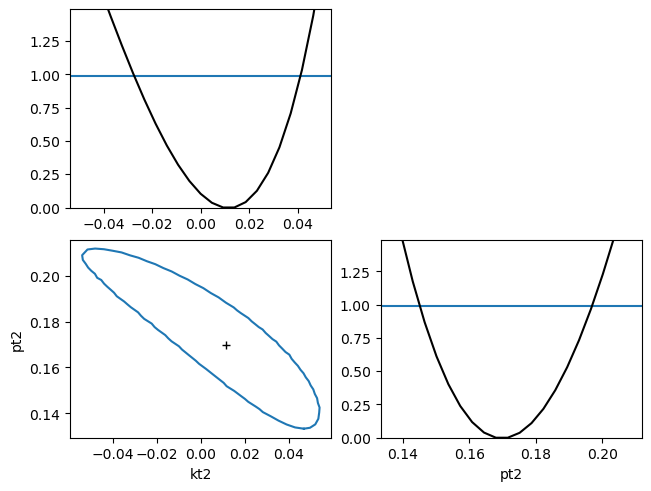

In [32]:
m_get_kT_pT.draw_mnmatrix()

E MnContours unable to find first two points
E MnContours unable to find first two points


ValueError: all the input arrays must have same number of dimensions, but the array at index 0 has 2 dimension(s) and the array at index 1 has 1 dimension(s)

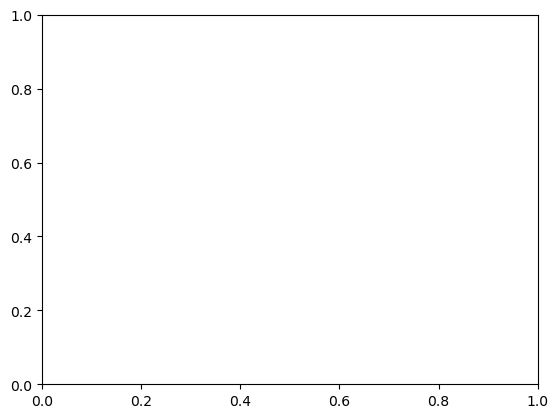

In [33]:
m_get_kT_pT.draw_mncontour("kt2", "pt2", cl=(0.68, 0.9, 0.99))